# 📚 About Dataset

This dataset provides a comprehensive and realistic representation of various factors associated with student performance in an educational environment. It captures demographic details, family background, study habits, school-related characteristics, and academic scores across key subjects. The purpose of this dataset is to offer a structured and versatile resource for anyone interested in understanding patterns, behaviors, and influences that contribute to student outcomes.

The dataset includes rich information such as parental education, access to learning resources, attendance, study duration, extracurricular involvement, and preferred study methods. These aspects help outline a broader context of a student's academic journey, beyond mere scores. The subject-wise marks in Mathematics, Science, and English, along with a computed overall performance score and final grade, provide a complete view of student achievements.

This dataset can be used for:

Educational research
Institutional planning and analysis
Understanding learning behavior trends
Examining the relationship between lifestyle and academic outcomes
Exploratory studies on attendance, study habits, or parental background
General-purpose data exploration and visualization

Because the data is synthetically generated, it avoids any privacy or ethical issues typically associated with student datasets. It reflects realistic patterns without containing personally identifiable information. The structure is designed to be clear, readable, and ready for analysis across all experience levels—from beginners exploring data for the first time to professionals conducting in-depth educational studies.

Source: Kaggle - https://www.kaggle.com/datasets/kundanbedmutha/student-performance-dataset/data

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

path = kagglehub.dataset_download("kundanbedmutha/student-performance-dataset")

print("Path to dataset files:", path)

100%|██████████| 516k/516k [00:00<00:00, 892kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kundanbedmutha/student-performance-dataset/versions/1


In [2]:
data = pd.read_csv(path + '/Student_Performance.csv')
data.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


#🔍 Exploratory Data Analysis (EDA)

## General Overview

- Shape and variables types information:

In [3]:
data.shape

(25000, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

Most of our variables are stores as objects types, this is not interesting when we think in classification models. This idea will be addressed later, in the Pre-Processing phase.

We have 25000 lines, this is enough to apply a Supervisioned ML Model.

- Analysis of nulls, types and estructrures

In [ ]:
data.isna().sum()

,0
student_id,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,0
attendance_percentage,0
internet_access,0
travel_time,0
extra_activities,0


There is no null in all of our columns.

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.dtypes.reset_index().rename(columns={'index':'Columns', 0:'Type'})

,Columns,Type
0,student_id,int64
1,age,int64
2,gender,object
3,school_type,object
4,parent_education,object
5,study_hours,float64
6,attendance_percentage,float64
7,internet_access,object
8,travel_time,object
9,extra_activities,object


## Descriptive Statistics

- Statistcs of our numeric variables

In [ ]:
data.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Univariate Analysis

- Plots to numeric variables

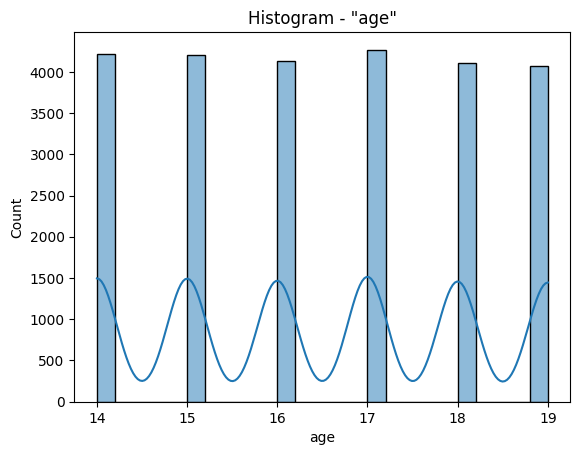

In [ ]:
sns.histplot(data['age'], kde = True)
plt.title('Histogram - "age"')
plt.show()

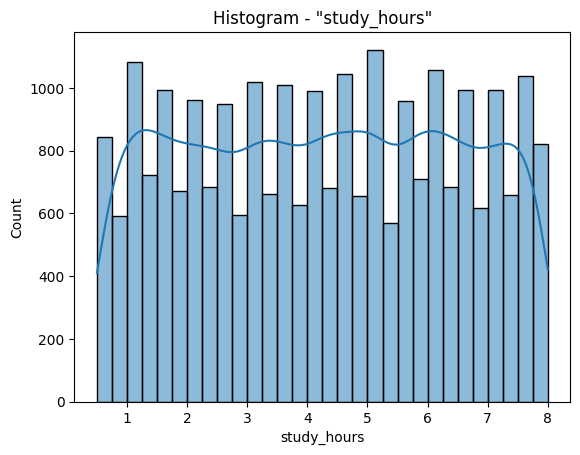

In [ ]:
sns.histplot(data['study_hours'], kde = True)
plt.title('Histogram - "study_hours"')
plt.show()

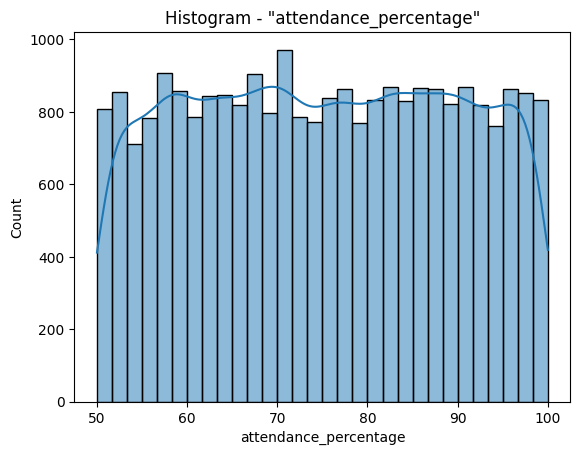

In [ ]:
sns.histplot(data['attendance_percentage'], kde = True)
plt.title('Histogram - "attendance_percentage"')
plt.show()

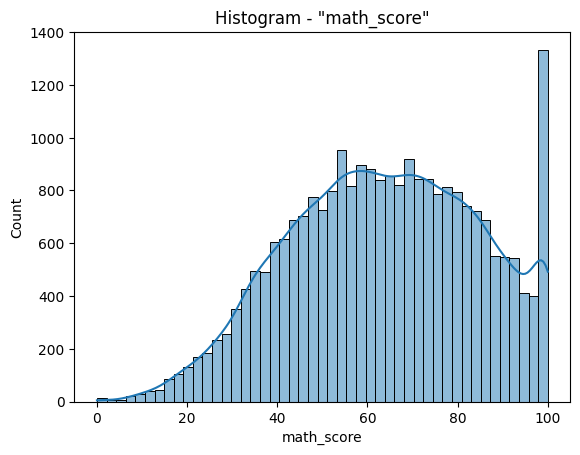

In [ ]:
sns.histplot(data['math_score'], kde = True)
plt.title('Histogram - "math_score"')
plt.show()

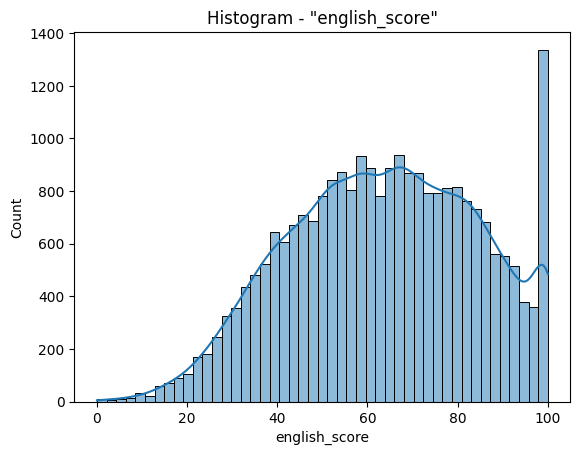

In [ ]:
sns.histplot(data['english_score'], kde = True)
plt.title('Histogram - "english_score"')
plt.show()

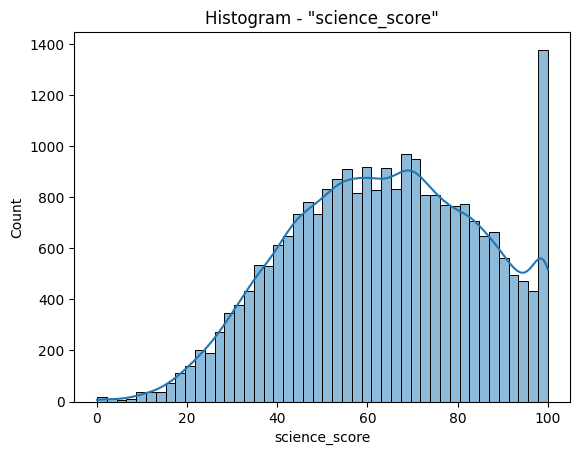

In [ ]:
sns.histplot(data['science_score'], kde = True)
plt.title('Histogram - "science_score"')
plt.show()

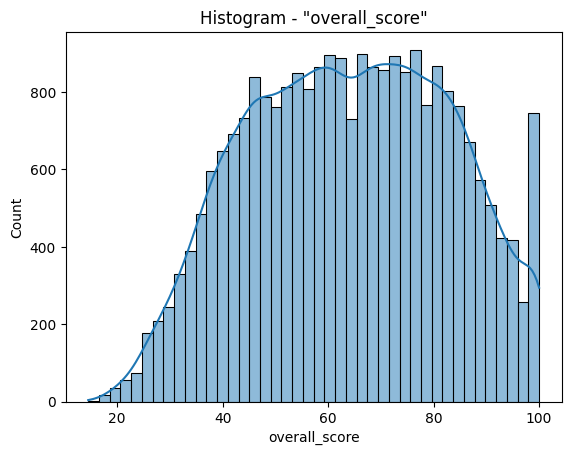

In [ ]:
sns.histplot(data['overall_score'], kde = True)
plt.title('Histogram - "overall_score"')
plt.show()

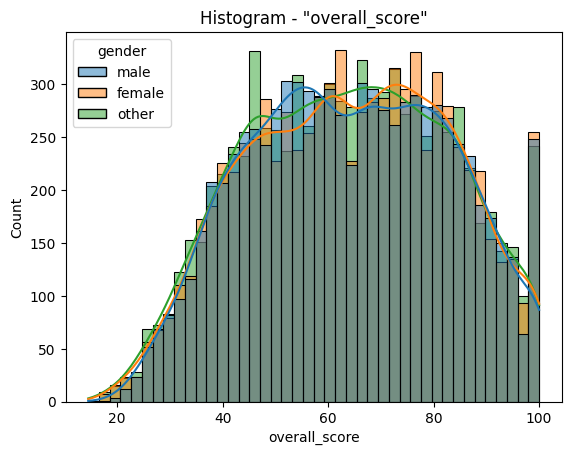

In [8]:
sns.histplot(data = data, x = 'overall_score', kde = True, hue = 'gender')
plt.title('Histogram - "overall_score"')
plt.show()

Initial insights: (1) The age interval of students are between 14 to 19 years, and, apparently, the distribuitions of this variable is uniform, visually there are not outliers; (2) The scores are not normlized and are curiously similars. Probably, corellation metrics between them will be high.

- Plots to non-numeric variables

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

/tmp/ipython-input-3479449299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="gender", palette="viridis")


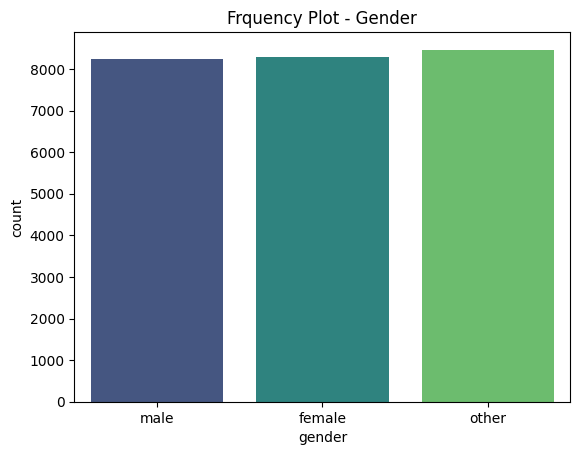

In [20]:
sns.countplot(data=data, x="gender", palette="viridis")

plt.title("Frquency Plot - Gender")
plt.show()

/tmp/ipython-input-2045436695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="school_type", palette="viridis")


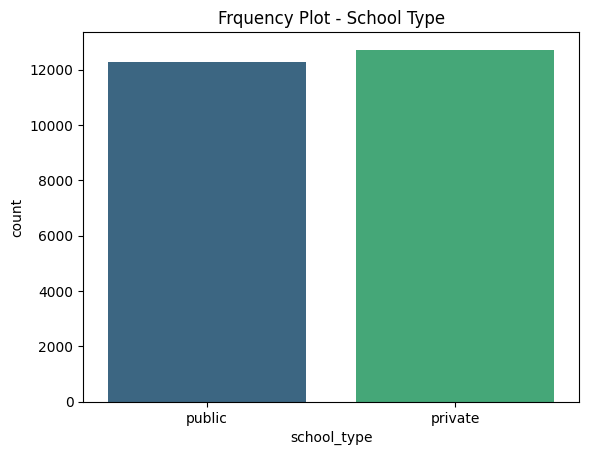

In [22]:
sns.countplot(data=data, x="school_type", palette="viridis")

plt.title("Frquency Plot - School Type")
plt.show()

/tmp/ipython-input-1334667169.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="parent_education", palette="viridis")


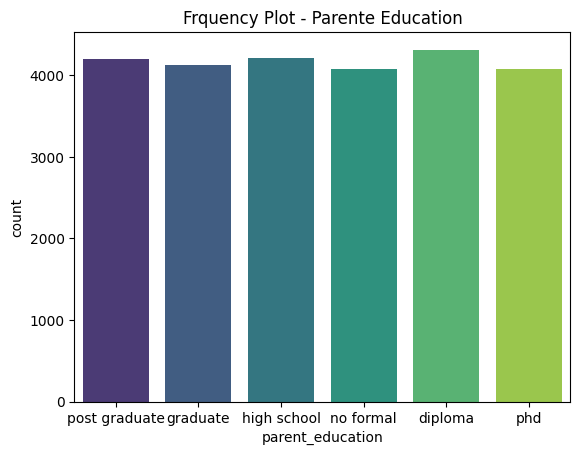

In [23]:
sns.countplot(data=data, x="parent_education", palette="viridis")

plt.title("Frquency Plot - Parente Education")
plt.show()

/tmp/ipython-input-121727455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="internet_access", palette="viridis")


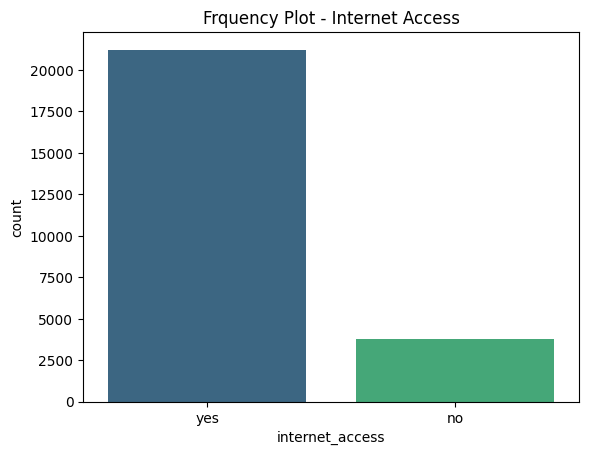

In [24]:
sns.countplot(data=data, x="internet_access", palette="viridis")

plt.title("Frquency Plot - Internet Access")
plt.show()

/tmp/ipython-input-7172334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="travel_time", palette="viridis")


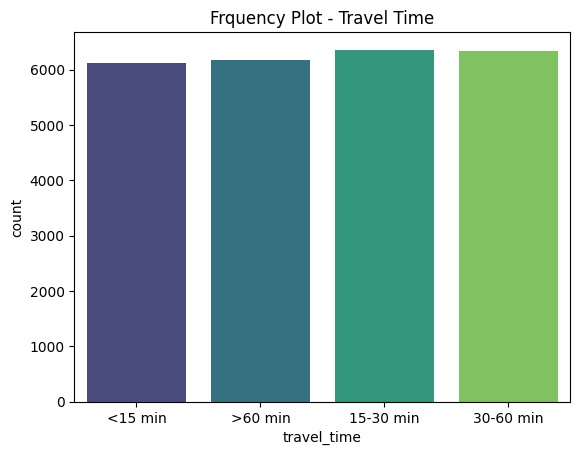

In [26]:
sns.countplot(data=data, x="travel_time", palette="viridis")

plt.title("Frquency Plot - Travel Time")
plt.show()

/tmp/ipython-input-583135058.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="study_method", palette="viridis")


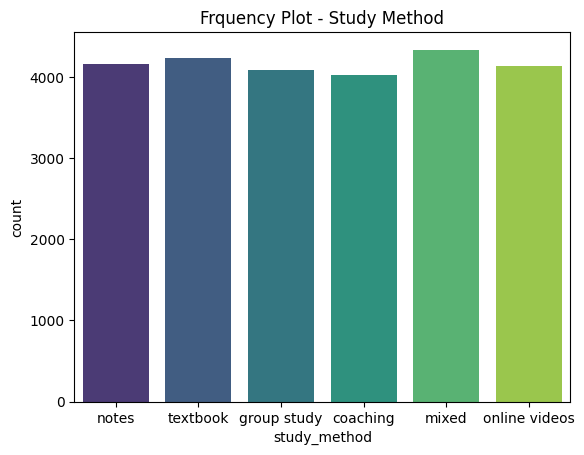

In [28]:
sns.countplot(data=data, x="study_method", palette="viridis")

plt.title("Frquency Plot - Study Method")
plt.show()

/tmp/ipython-input-3326546294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="extra_activities", palette="viridis")


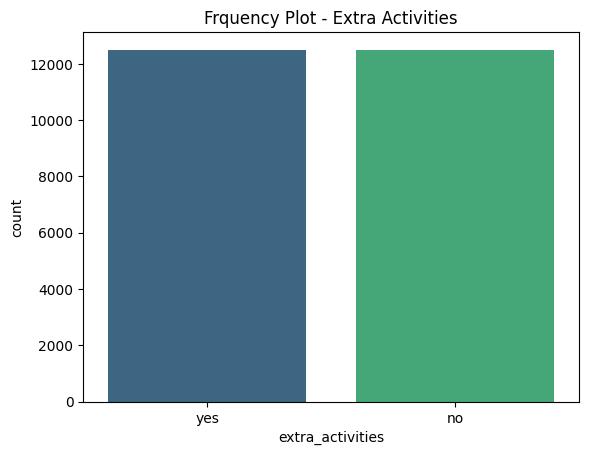

In [29]:
sns.countplot(data=data, x="extra_activities", palette="viridis")

plt.title("Frquency Plot - Extra Activities")
plt.show()

And the one last, we have to see our taregt variable:

/tmp/ipython-input-4178475616.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="final_grade", palette="viridis")


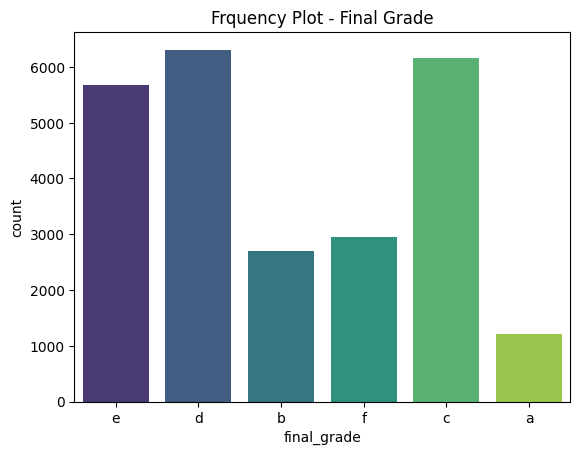

In [30]:
sns.countplot(data=data, x="final_grade", palette="viridis")

plt.title("Frquency Plot - Final Grade")
plt.show()

There are two non-numeric variables that we have more differences between the values: final_grade (target) and internet_access.

## Bivariate Analysis

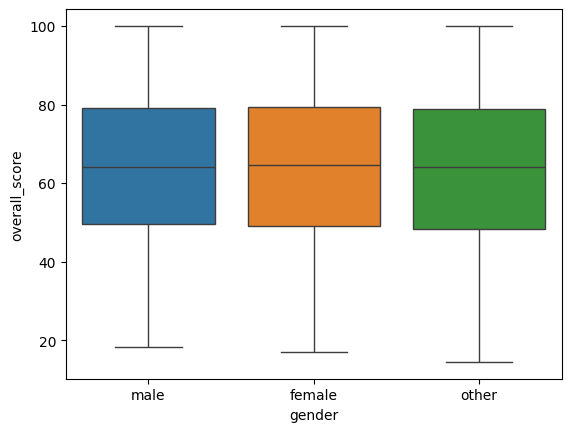

In [12]:
sns.boxplot(data = data, y = 'overall_score', x = 'gender', hue='gender')
plt.show()

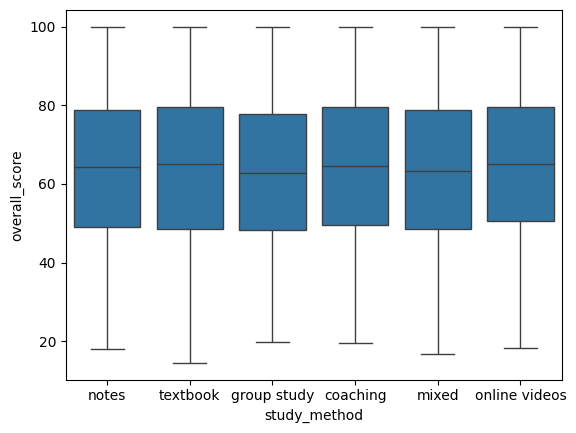

In [14]:
sns.boxplot(data = data, y = 'overall_score', x = 'study_method')
plt.show()

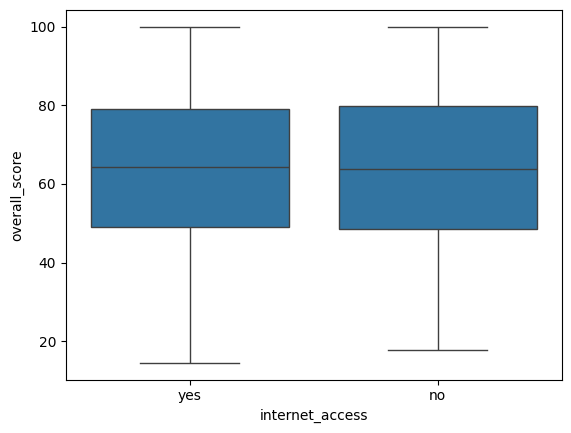

In [31]:
sns.boxplot(data = data, y = 'overall_score', x = 'internet_access')
plt.show()

Despite the difference in frenquencies values of internet_access, it's not relevenat when we cobined with overall_score. It's interesting.